<a href="https://colab.research.google.com/github/igorpereirabr1/Colaboratory/blob/master/Binary_Classification_Dog_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 - Objective

Implement a CNN with Keras and Tensorflow to predict classes of images

# 01- Mount Directory and Define project Path

In [7]:

import os
import sys
from google.colab import drive

drive.mount('/content/gdrive')

project_path = "/content/gdrive/My Drive/01-DataScience/01-Deep Learning/01-Keras/00-CNN"

dataset_path = "/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets"



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 02 - Download the Dataset and Unzip

In [0]:
#Set current path to download files

os.chdir(dataset_path)


In [0]:
#Download the Dataset
##!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [0]:
#unzip the dataset
!unzip kagglecatsanddogs_3367a.zip

In [0]:
#Check current files
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 13 16:47 .
drwxr-xr-x 1 root root 4096 May 16 10:25 ..
drwxr-xr-x 1 root root 4096 May 13 16:48 .config
drwxr-xr-x 1 root root 4096 May 13 16:48 sample_data


In [0]:
#Remove zip file 
!rm kagglecatsanddogs_3367a.zip


In [0]:
#set the new dataset path
dataset_path = os.path.join(dataset_path,'PetImages')

# 03 -Importing Libraries and Splitting the Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Convolution2D,Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import History 
import matplotlib.pyplot as plt


In [0]:
#Initialize the CNN
classifier = Sequential()

#Step 1  - Convulution
classifier.add(Conv2D(32,(3,3),input_shape= (64, 64, 3),activation='relu'))
#classifier.add(Convolution2D(32,3,3,input_shape= (64, 64, 3),activation='relu'))

#Step 2 - Polling
classifier.add(MaxPooling2D(pool_size=(2,2)))

################################
classifier.add(Conv2D(32, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))
################################

#Step 3 - Flatten
classifier.add(Flatten())

# 4 — Full Connection

In [0]:
#Step 4 - Full Connection
#classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(activation="relu", units=128))

#classifier.add(Dense(output_dim=1,activation='sigmoid'))
classifier.add(Dense(units=1,activation='sigmoid'))



#Step 5 - Compile the CNN

classifier.compile(optimizer = "adam", loss='binary_crossentropy', metrics = ['accuracy'])

# 5 - Split the Dataset

In [35]:
#remove corrupted image files

!rm '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11703.jpg'
!rm '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Cat/666.jpg'
!rm '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11702.jpg'

rm: cannot remove '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Dog/11703.jpg': No such file or directory
rm: cannot remove '/content/gdrive/My Drive/01-DataScience/01-Deep Learning/00-Datasets/PetImages/Cat/666.jpg': No such file or directory


In [137]:
from keras.preprocessing.image import ImageDataGenerator, load_img


#For this case, we don't need use Data Augmentation, cause we have a big dataset
datagen = ImageDataGenerator(rescale=1./255
                                   ,validation_split=0.33
        ,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



training_set = datagen.flow_from_directory(
        directory=dataset_path,
        target_size=(64, 64),
        batch_size=32,
        #classes=['Dog','Cat'],
        subset = "training",
        #save_to_dir = '/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/02_CNN_Keras_Tensorflow/03_CNN_Keras_Tensorflow_FaceDetection/train_set',
        class_mode='binary')

test_set = datagen.flow_from_directory(
       directory=dataset_path,
        target_size=(64, 64),
        batch_size=32,
        #classes=['Dog','Cat'],
        subset = "validation",
        #save_to_dir = '/content/gdrive/My Drive/Colab Notebooks/01ComputerVision/01OpenCV/02_CNN_Keras_Tensorflow/03_CNN_Keras_Tensorflow_FaceDetection/validation_set',
        class_mode='binary')

STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size

Found 16749 images belonging to 2 classes.
Found 8248 images belonging to 2 classes.


# 6 - Training our Network

In [0]:
history = History()
epochs = 50

classifier.fit_generator(training_set,steps_per_epoch=STEP_SIZE_TRAIN,epochs=epochs,validation_data=test_set,validation_steps=STEP_SIZE_VALID,callbacks=[history])

523/523 [==============================] - 222s 424ms/step - loss: 0.3574 - acc: 0.8435 - val_loss: 0.4189 - val_acc: 0.8109
Epoch 4/50
 32/523 [>.............................] - ETA: 3:05 - loss: 0.3871 - acc: 0.8326

In [139]:
#Save the Model and Weights
import json 
# serialize model to JSON
model_json = classifier.to_json()
with open(os.path.join(project_path,"Binary-Classification-Dog-vs-Cats - model.json"), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights(os.path.join(project_path,"Binary-Classification-Dog-vs-Cats - weights.h5"))
print("Saved model to disk")

Saved model to disk


# Evaluate out model

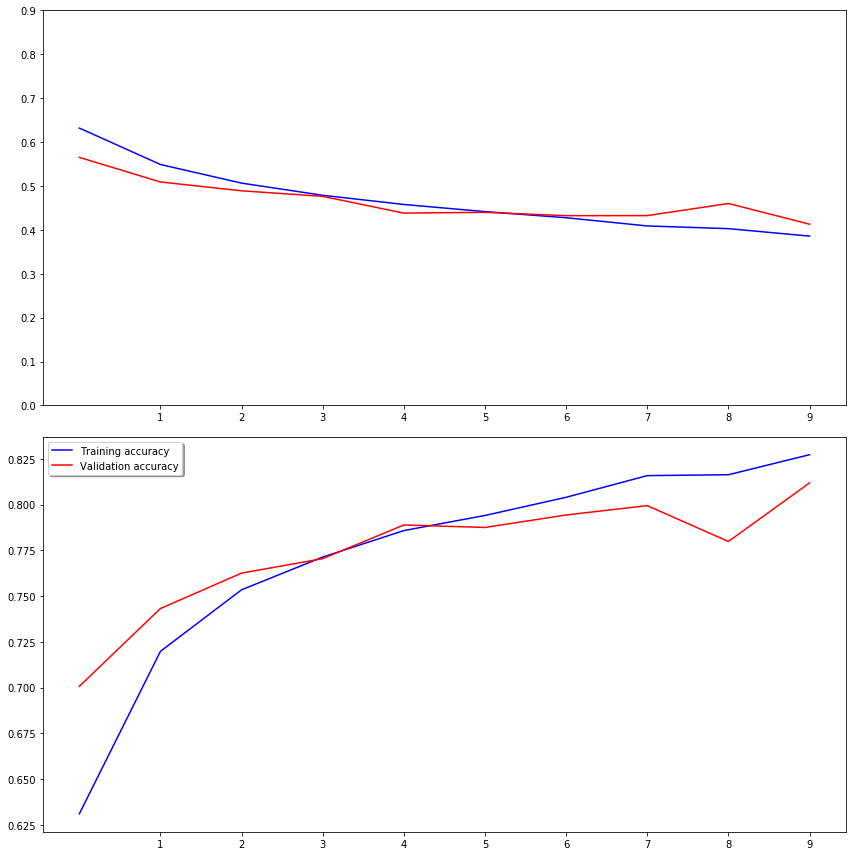

In [140]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.label=True
plt.tight_layout()
plt.show()



In [141]:
validation_datagen = ImageDataGenerator(rescale=1./255
  ,validation_split=0.05)
  #,shear_range=0.2,
  #      zoom_range=0.2,
  #      horizontal_flip=True)


validation_set = validation_datagen.flow_from_directory(
       directory=dataset_path,
        target_size=(64, 64),
        batch_size=32,
        subset = "validation",
        class_mode='binary')

STEP_SIZE_VALID=validation_set.n//validation_set.batch_size


predictions = classifier.predict_generator(validation_set, steps=STEP_SIZE_VALID)

loss, acc = classifier.evaluate_generator(validation_set, steps=STEP_SIZE_VALID, verbose=0)

print(" The Accuracy for this model is :"+str(acc), " and the Loss is it "+str(loss))




Found 1248 images belonging to 2 classes.
 The Accuracy for this model is :0.8012820512820513  and the Loss is it 0.4073787583754613


In [0]:
classe_map = validation_set.class_indices

threshold = 0.5

df = pd.DataFrame()


df['labels'] = validation_set.labels
df['filepaths'] = validation_set.filepaths
df['filename'] = validation_set.filenames
df['name'] = [str(k).split('/')[0] for k in validation_set.filenames]

df['probability'] = predictions
df['category'] = np.where(df['probability'] > threshold, 1,0)
df['category_name'] = df['category'].apply(lambda x: list(classe_map.keys())[list(classe_map.values()).index(x)])


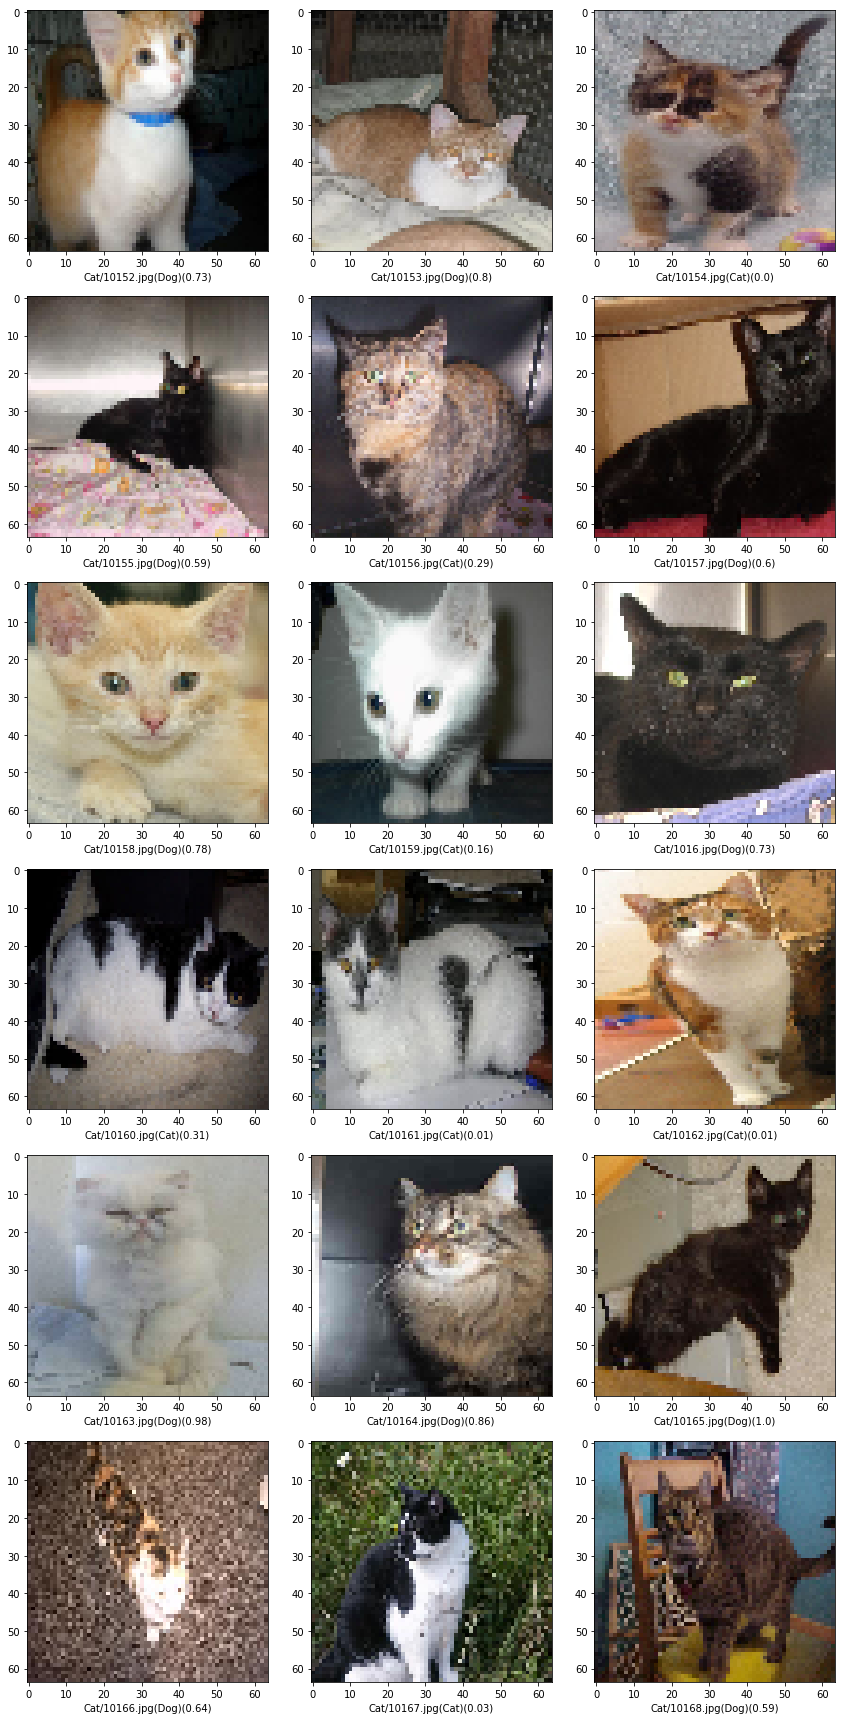

In [144]:
IMAGE_SIZE = validation_set.image_shape[:-1]

np.random.np.random.randint

ix = np.random.np.random.randint(len(df)-18)

sample_test = df[ix:ix+18]
sample_test.head()
plt.figure(figsize=(12, 24))
index =0
for x, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category_name']
    probability = row['probability']
    file_path = row['filepaths']
    img = load_img(file_path, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    index +=1
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' '(' + "{}".format(round(probability, 2)) + ')')
plt.tight_layout()
plt.show()